## Reducing Domestic Demand - Underfloor Heating


In [138]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import datetime 
from datetime import datetime,timedelta

plt.style.use('seaborn')

# importing River Temperature for 2020 dataframe from previous script
%store -r temp_2020_df

In [139]:
temp_2020_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 8763 to 10226
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Time                             1460 non-null   datetime64[ns]
 1   Temp_river                       1460 non-null   float64       
 2   Temp_air                         1460 non-null   float64       
 3   Temp_SMA                         1460 non-null   float64       
 4   Temp_network                     1460 non-null   float64       
 5   COP_BIHP                         1460 non-null   float64       
 6   HDD                              1460 non-null   float64       
 7   Space_Heating_Demand             1460 non-null   float64       
 8   DHW_local                        1460 non-null   float64       
 9   BIHP_Demand                      1460 non-null   float64       
 10  Cooking_local                    1460 non-null   float64

In [140]:
temp_2020_df.describe()

,Temp_river,Temp_air,Temp_SMA,Temp_network,COP_BIHP,HDD,Space_Heating_Demand,DHW_local,BIHP_Demand,Cooking_local,Total_Domestic_Demand,COP_BIHP_Improved,SpaceHeating_Reduced,Domestic_Demand_Reduced,Passivhaus_Space_Heating_Demand,Passivhaus_Space_Demand
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1.460000e+03,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,10.585627,11.270570,13.383459,13.383459,3.582060,1.199899,1.715910,0.485794,2.201704,1.775342e-01,2.379238,5.930470,1.064553,1.727882,1.027397,0.183594
std,5.529673,4.891476,2.213340,2.213340,0.184945,1.030421,1.474768,0.023065,1.491401,2.720978e-15,1.491401,0.580344,0.915491,0.932173,0.882284,0.157887
min,-2.221879,1.524540,12.000000,12.000000,3.470312,0.000000,0.000000,0.394077,0.394077,1.775342e-01,0.571611,5.591964,0.000000,0.571611,0.000000,0.000000
25%,6.529434,6.844139,12.000000,12.000000,3.470312,0.000000,0.000000,0.470242,0.470851,1.775342e-01,0.648385,5.591964,0.000000,0.648385,0.000000,0.000000
50%,10.183606,10.941674,12.000000,12.000000,3.470312,1.139581,1.630342,0.500212,2.130553,1.775342e-01,2.308088,5.591964,1.011773,1.689518,0.975751,0.174492
75%,14.633891,15.958857,14.875908,14.875908,3.691487,2.163965,3.095876,0.500212,3.596088,1.775342e-01,3.773622,6.232066,1.921267,2.599013,1.852866,0.331344
max,29.105459,22.466850,22.184586,22.184586,4.404950,3.493865,4.998497,0.500212,5.498708,1.775342e-01,5.676243,8.788738,3.102013,3.779759,2.991575,0.534977


In [141]:
# Defining Network temperature 
Temp_network = temp_2020_df['Temp_SMA']
Temp_network[Temp_network < 12] = 12

# Adding Network temperature to dataframe
temp_2020_df['Temp_network'] = Temp_network

<ipython-input-141-4f84d8d06345>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Temp_network[Temp_network < 12] = 12


In [142]:
# Calculating COP
Domestic_temp = 273.15 + 40
Performance_factor = 0.5
T_domestic = np.full((len(temp_2020_df['Temp_network']),1), Domestic_temp)
T_supply = np.array([temp_2020_df['Temp_network'] + 273.15]).T

COP_domestic_ideal = T_domestic / (T_domestic - T_supply)
COP_domestic_2 = (COP_domestic_ideal) * Performance_factor

temp_2020_df['COP_BIHP_Improved'] = COP_domestic_2

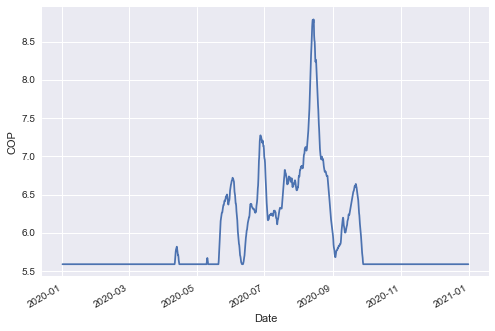

In [143]:
# Plotting COP variation over the year 
fig = plt.figure()
plt.plot(temp_2020_df['Time'], temp_2020_df['COP_BIHP_Improved'])
plt.xlabel('Date')
plt.ylabel('COP')
fig.autofmt_xdate()


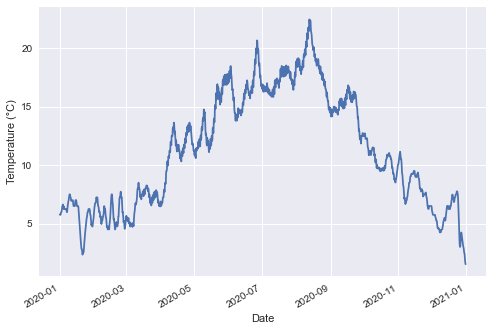

In [144]:
fig = plt.figure()
plt.plot(temp_2020_df['Time'],temp_2020_df['Temp_air'])
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
fig.autofmt_xdate()


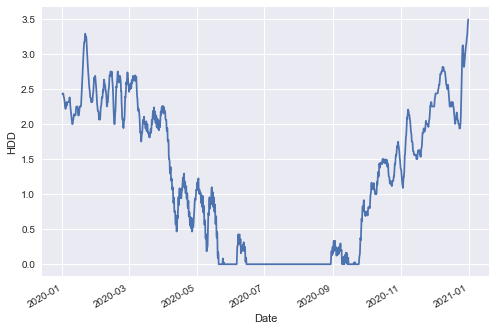

In [145]:
# Calculating HDD
T_b = 15.5
T_air = np.array([temp_2020_df['Temp_air']]).T
HDD = np.zeros((len(T_air),1))

for i in range(len(T_air)):
    if T_air[i] < 15.5:
        HDD[i] = (T_b - T_air[i]) * (6/24)
    else: 
        HDD[i] = 0

temp_2020_df['HDD'] = HDD

fig = plt.figure()
plt.plot(temp_2020_df['Time'], temp_2020_df['HDD'])
plt.xlabel('Date')
plt.ylabel('HDD')
fig.autofmt_xdate()


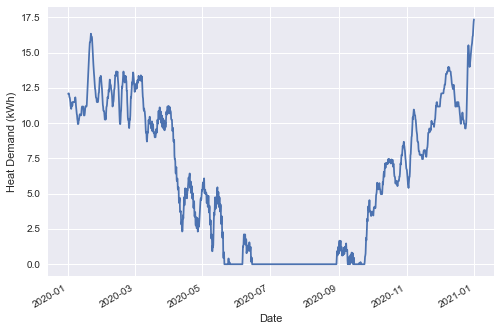

In [146]:
# Heating Demand 
Heat_demand = np.zeros((len(T_air),1))
Total_HDD = sum(HDD)
Total_heat = 8697.6    # previously calculated total heating demand 

Heat_demand = (HDD / Total_HDD) * Total_heat    # in kWh for 6 hour slots 

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Heat_demand)
plt.xlabel('Date')
plt.ylabel('Heat Demand (kWh)')
fig.autofmt_xdate()

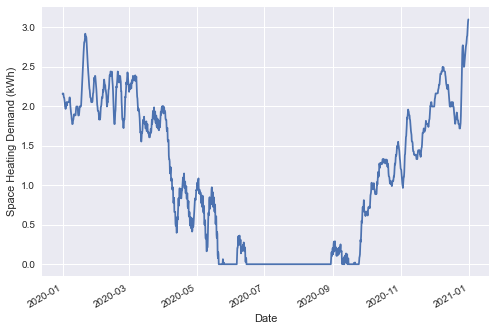

In [147]:
# Electricity Demand for space heating 
Domestic_Demand = Heat_demand / COP_domestic_2

temp_2020_df['SpaceHeating_Reduced'] = Domestic_Demand

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Domestic_Demand)
plt.xlabel('Date')
plt.ylabel('Space Heating Demand (kWh)')
fig.autofmt_xdate()


In [148]:
SpaceHeating_Demand = Domestic_Demand.sum()
print(SpaceHeating_Demand)

1554.2477231045987


In [149]:
# Can add on the same Hot Water and Cooking demand as previously calculated for Domestic use

Domestic_Demand_Reduced = temp_2020_df['SpaceHeating_Reduced'] + temp_2020_df['DHW_local'] + temp_2020_df['Cooking_local']

temp_2020_df['Domestic_Demand_Reduced'] = Domestic_Demand_Reduced


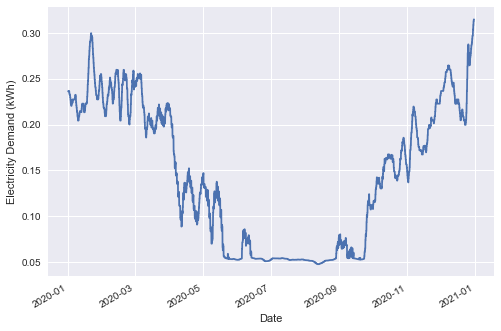

In [150]:
# converting to 30 min data 
year = '2020'
dti = pd.date_range(year + '-01-01', periods=17520, freq="0.5H")
 
Domestic_Demand_Reduced_30 = np.zeros(17520)
 
for i in range(len(temp_2020_df['Time'])):
  amount = temp_2020_df.iloc[i]['Domestic_Demand_Reduced']/ 12
  small_array = amount * np.ones(12)
  Domestic_Demand_Reduced_30[i*12 : (i + 1)*12] = small_array

# plotting 30 min data 
fig = plt.figure()
plt.plot(dti, Domestic_Demand_Reduced_30)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

In [151]:
Domestic_Demand_Reduced_30.sum()

2522.7075838132923

In [152]:
# converting to data to csv 
d = {'Time': dti, 'Domestic Demand Reduced': Domestic_Demand_Reduced_30}
domestic_df = pd.DataFrame(data=d)

In [153]:
domestic_df.to_csv('domestic_demand_reduced.csv')

## Cavity Wall Insulation



In [154]:
# Creating dataframe for demand with cavity wall insulation

Domestic_Demand_Walls = temp_2020_df['Space_Heating_Demand'] * 0.8
d = {'Time': temp_2020_df['Time'], 'Space Demand': Domestic_Demand_Walls}
walls_df = pd.DataFrame(data=d)

In [155]:
# Adding DHW and Cooking demand 
walls_df['Total_Demand'] = walls_df['Space Demand'] + temp_2020_df['DHW_local'] + temp_2020_df['Cooking_local']

In [156]:
# converting to 30 min data 
year = '2020'
dti = pd.date_range(year + '-01-01', periods=17520, freq="0.5H")
 
Walls_Demand_30 = np.zeros(17520)
 
for i in range(len(walls_df['Time'])):
  amount = walls_df.iloc[i]['Total_Demand']/ 12
  small_array = amount * np.ones(12)
  Walls_Demand_30[i*12 : (i + 1)*12] = small_array

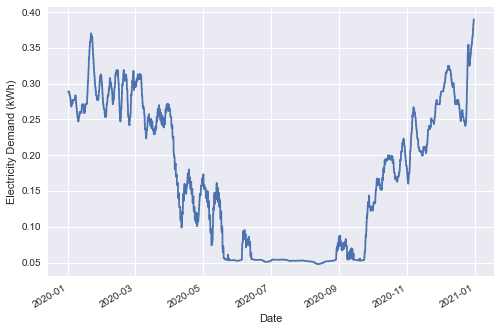

In [157]:
# plotting 30 min data 
fig = plt.figure()
plt.plot(dti, Walls_Demand_30)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

In [158]:
Walls_Demand_30.sum()

2972.642179760664

In [159]:
# converting to data to csv 
d = {'Time': dti, 'Walls Total Demand': Walls_Demand_30}
walls_30_df = pd.DataFrame(data=d)

In [160]:
walls_30_df.to_csv('Walls_demand.csv')

## Double Glazing

In [161]:
# Creating dataframe for demand with double glazing

Domestic_Demand_Windows = temp_2020_df['Space_Heating_Demand'] * 0.9
d = {'Time': temp_2020_df['Time'], 'Space Demand': Domestic_Demand_Windows}
windows_df = pd.DataFrame(data=d)

In [162]:
# Adding DHW and Cooking demand 
windows_df['Total_Demand'] = windows_df['Space Demand'] + temp_2020_df['DHW_local'] + temp_2020_df['Cooking_local']

In [163]:
# converting to 30 min data 
year = '2020'
dti = pd.date_range(year + '-01-01', periods=17520, freq="0.5H")
 
Windows_Demand_30 = np.zeros(17520)
 
for i in range(len(windows_df['Time'])):
  amount = windows_df.iloc[i]['Total_Demand']/ 12
  small_array = amount * np.ones(12)
  Windows_Demand_30[i*12 : (i + 1)*12] = small_array

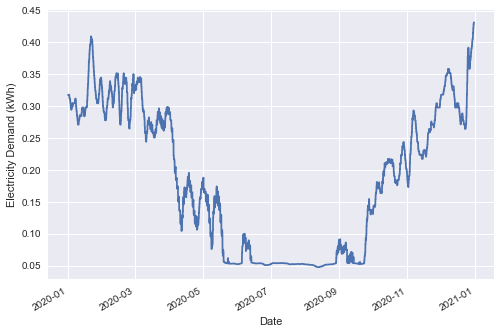

In [164]:
# plotting 30 min data 
fig = plt.figure()
plt.plot(dti, Windows_Demand_30)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

In [165]:
Windows_Demand_30.sum()

3223.16496964216

In [166]:
# converting to data to csv 
d = {'Time': dti, 'Windows Total Demand': Windows_Demand_30}
windows_30_df = pd.DataFrame(data=d)

In [167]:
windows_30_df.to_csv('Windows_demand.csv')

## Loft Insulation

In [168]:
# Creating dataframe for demand with loft insulation

Domestic_Demand_Loft = temp_2020_df['Space_Heating_Demand'] * 0.85
d = {'Time': temp_2020_df['Time'], 'Space Demand': Domestic_Demand_Loft}
loft_df = pd.DataFrame(data=d)

In [169]:
# Adding DHW and Cooking demand 
loft_df['Total_Demand'] = loft_df['Space Demand'] + temp_2020_df['DHW_local'] + temp_2020_df['Cooking_local']

In [170]:
# converting to 30 min data 
year = '2020'
dti = pd.date_range(year + '-01-01', periods=17520, freq="0.5H")
 
Loft_Demand_30 = np.zeros(17520)
 
for i in range(len(loft_df['Time'])):
  amount = loft_df.iloc[i]['Total_Demand']/ 12
  small_array = amount * np.ones(12)
  Loft_Demand_30[i*12 : (i + 1)*12] = small_array

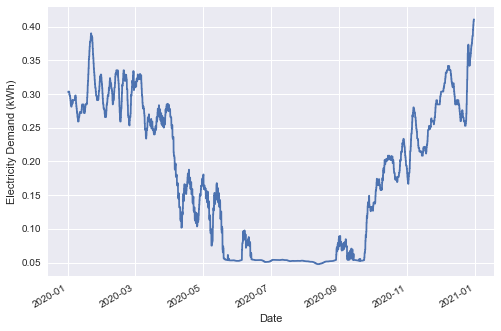

In [171]:
# plotting 30 min data 
fig = plt.figure()
plt.plot(dti, Loft_Demand_30)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

In [172]:
Loft_Demand_30.sum()

3097.903574701412

In [173]:
# converting to data to csv 
d = {'Time': dti, 'Loft Total Demand': Loft_Demand_30}
loft_30_df = pd.DataFrame(data=d)

In [174]:
loft_30_df.to_csv('Loft_demand.csv')

## Looking ahead to 2050

Want to look at housing increase being met by Passivhaus homes 

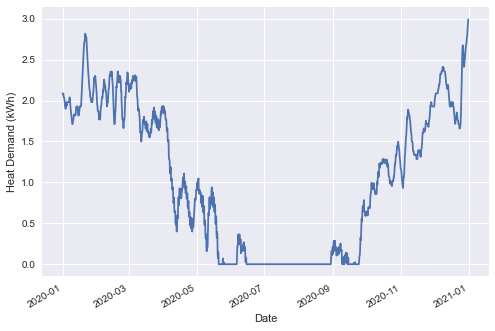

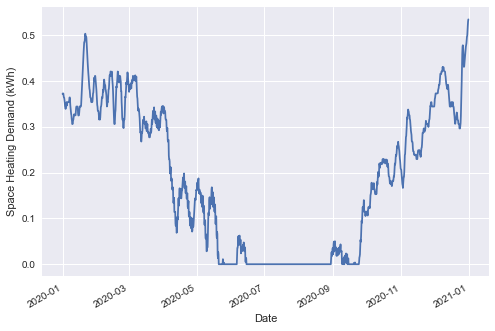

In [175]:
# Passivhaus Space Heating Demand 
Heat_demand = np.zeros((len(T_air),1))
Total_heat = 1500             # standard for Passivhaus homes 

Heat_demand = (HDD / Total_HDD) * Total_heat    # in kWh for 6 hour slots 

temp_2020_df['Passivhaus_Space_Heating_Demand'] = Heat_demand

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Heat_demand)
plt.xlabel('Date')
plt.ylabel('Heat Demand (kWh)')
fig.autofmt_xdate()

# Electricity Demand for space heating 
Passivhaus_Demand = Heat_demand / COP_domestic_2

temp_2020_df['Passivhaus_Space_Demand'] = Passivhaus_Demand

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Passivhaus_Demand)
plt.xlabel('Date')
plt.ylabel('Space Heating Demand (kWh)')
fig.autofmt_xdate()

In [176]:
# Adding DHW 
Passivhaus_BIHP_Demand = temp_2020_df['Passivhaus_Space_Demand'] + temp_2020_df['DHW_local']

In [187]:
# sizing BIHP 
Passivhaus_BIHP_max_demand = Passivhaus_BIHP_Demand.max()     # finding max electrical 
max_index = np.argmax(Passivhaus_BIHP_Demand)
print(Passivhaus_BIHP_max_demand)
print(max_index)

BIHP_max = 2    #rounding up for safety 
COP_max_demand = temp_2020_df.iloc[max_index]['COP_BIHP']

BIHP_Qc = (BIHP_max / 6) * (COP_max_demand - 1)
print(BIHP_Qc)

1.0351889576447975
1459
0.8234374999999999


1236.507550261777


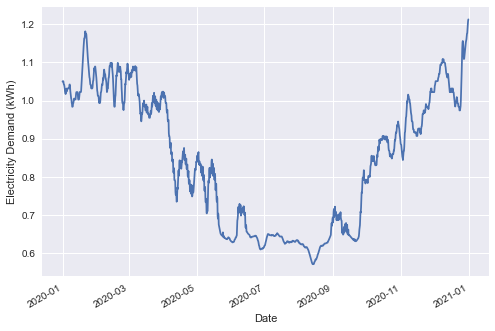

In [403]:
# Including cooking demand for total domestic demand 
Total_Passivhaus_Demand = temp_2020_df['Passivhaus_Space_Demand'] + temp_2020_df['DHW_local'] + temp_2020_df['Cooking_local']


temp_2020_df['Total_Passivhaus_Demand'] = Total_Passivhaus_Demand

fig = plt.figure()
plt.plot(temp_2020_df['Time'], Total_Passivhaus_Demand)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

# Calculating annual electricity demand in kWh
Total_Electricity_Demand = Total_Passivhaus_Demand.sum()
print(Total_Electricity_Demand)

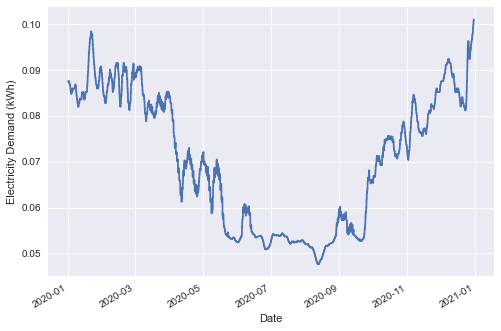

In [404]:
# converting to 30 min data 
year = '2020'
dti = pd.date_range(year + '-01-01', periods=17520, freq="0.5H")
 
Passivhaus_30_demand = np.zeros(17520)
 
for i in range(len(temp_2020_df['Time'])):
  amount = temp_2020_df.iloc[i]['Total_Passivhaus_Demand']/ 12
  small_array = amount * np.ones(12)
  Passivhaus_30_demand[i*12 : (i + 1)*12] = small_array

# plotting 30 min data 
fig = plt.figure()
plt.plot(dti, Passivhaus_30_demand)
plt.xlabel('Date')
plt.ylabel('Electricity Demand (kWh)')
fig.autofmt_xdate()

In [405]:
# converting to data to csv 
d = {'Time': dti, 'Passivhaus Demand': Passivhaus_30_demand}
passivhaus_df = pd.DataFrame(data=d)

passivhaus_df.to_csv('passivhaus_demand.csv')